# 코로나 전, 후 지하철 이용객의 변화 - 지하철 2호선 중심으로

<br></br>
  
#### Description
  + 이용객수가 많은 지하철 2호선을 중심으로 하여 코로나 전,후의 지하철 이용객의 변화를 분석해보려고 한다.    


#### Dataset

  +  서울시 지하철 호선별 역별 시간대별 승하차 인원 정보 (2015.01 ~ 2021.04)
          
          - [서울시열린데이터광장]
          
          
<br>          

### 1. 데이터 전처리 및 정제

- 연도마다 다른 지하철역 표기방식 통일.
- '승차인원' + '하차인원' = 총이용객수 구해주어 '시간'  열 안에 넣어주기
- 분석에 필요없는 열 제거('호선명','작업일자' 등)
- 데이터타입 변경
<br>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [69]:
subway = pd.read_csv('Documents/data/subway.csv', encoding = 'cp949')
subway.tail() #하위 5개 데이터 확인. 2015년 1월부터 수집한 데이터임을 알 수 있음.

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
44117,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
44118,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
44119,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
44120,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
44121,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


In [70]:
subway.head()   #상위 5개 데이터 확인. (2021년 4월까지 수집되어있음을 확인.) 

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202104,1호선,동대문,635,9,12446,1948,8958,7019,14035,...,8304,14,1286,1,2,0,0,0,0,20210503
1,202104,1호선,동묘앞,57,3,2966,885,3409,4736,5917,...,2344,3,1198,0,0,0,0,0,0,20210503
2,202104,1호선,서울역,746,16,9151,6038,11560,33958,36079,...,7638,13,570,0,0,0,0,0,0,20210503
3,202104,1호선,시청,29,0,1711,3796,2774,19145,6323,...,1308,5,86,0,0,0,0,0,0,20210503
4,202104,1호선,신설동,270,10,8305,3003,7977,10434,17091,...,5136,9,294,0,0,0,0,0,0,20210503



- 데이터의 상위, 하위 5개를 통하여 2015년 1월부터 2021년 4월까지 수집된 데이터이며,

   각 열에는 날짜,호선명, 지하철역 시간에 따른 승, 하차인원 정보가 들어가 있음을 확인하였다.
<br></br>   
-  또한, info()함수를 사용하여 결측치가 있는지, 각 열의 데이터 타입은 어떻게 구성되어 있는지 확인하였다. 
<br></br>

In [71]:
subway.info()  #결측치 확인, 데이터타입 확인.(memory usage = 17.5MB)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44122 entries, 0 to 44121
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           44122 non-null  int64 
 1   호선명           44122 non-null  object
 2   지하철역          44122 non-null  object
 3   04시-05시 승차인원  44122 non-null  int64 
 4   04시-05시 하차인원  44122 non-null  int64 
 5   05시-06시 승차인원  44122 non-null  int64 
 6   05시-06시 하차인원  44122 non-null  int64 
 7   06시-07시 승차인원  44122 non-null  int64 
 8   06시-07시 하차인원  44122 non-null  int64 
 9   07시-08시 승차인원  44122 non-null  int64 
 10  07시-08시 하차인원  44122 non-null  int64 
 11  08시-09시 승차인원  44122 non-null  int64 
 12  08시-09시 하차인원  44122 non-null  int64 
 13  09시-10시 승차인원  44122 non-null  int64 
 14  09시-10시 하차인원  44122 non-null  int64 
 15  10시-11시 승차인원  44122 non-null  int64 
 16  10시-11시 하차인원  44122 non-null  int64 
 17  11시-12시 승차인원  44122 non-null  int64 
 18  11시-12시 하차인원  44122 non-null  int64 
 19  12시-


<br></br>
- 지하철 2호선을 중심으로 분석하기 위해 호선명에서 2호선만을 추출하였다. 
<br></br>


In [72]:
#지하철 2호선 데이터만 추출.
subway02 = subway[subway.호선명 == '2호선']
subway02.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
10,202104,2호선,강남,85,6,5464,10853,15861,49435,36772,...,12861,7,4,0,0,0,0,0,0,20210503
11,202104,2호선,강변(동서울터미널),8,1,7826,1835,25393,18766,76778,...,13648,3,292,0,0,0,0,0,0,20210503
12,202104,2호선,건대입구,143,5,13027,1840,19746,18737,50914,...,21087,11,2046,0,0,0,0,0,0,20210503
13,202104,2호선,교대(법원.검찰청),39,0,2090,6880,11797,25586,24036,...,7354,2,29,0,1,0,0,0,0,20210503
14,202104,2호선,구로디지털단지,172,6,39043,5617,52721,21441,134488,...,34189,0,78,0,0,0,0,0,0,20210503


-  현재, 지하철 2호선은, 총 51개의 역으로 구성되어 있다.

   하지만, 수집된 데이터의 지하철역이 잘 표기 되어있는지 확인한 결과 62개의 지하철역으로 구성되어 있다는 것을 발견하였다 

   수집된 지하철역 이름을 확인해 본 결과, 년도마다 다른 표기방식으로 인하여 '강변' '강변(동서울터미널)'과 같이
   
   같은 역임에도 다른역으로 인식 되는 것을 확인할 수 있었다.
   
   이러한 점을 수정해주어 2호선역이 총 51개의 역으로 구성되도록 하였다.

In [73]:
len(set(subway02.지하철역))   #현재 지하철 2호선 지하철역수는 51개!!(지하철역 이름이 잘못 표기된 부분이 있음을 알 수 있음.)

62

In [74]:
#표시된 지하철역 이름 확인.
set(subway02.지하철역)

{'강남',
 '강변',
 '강변(동서울터미널)',
 '건대입구',
 '교대',
 '교대(법원.검찰청)',
 '구로디지털단지',
 '구의',
 '구의(광진구청)',
 '낙성대',
 '낙성대(강감찬)',
 '당산',
 '대림',
 '대림(구로구청)',
 '도림천',
 '동대문역사문화공원',
 '동대문역사문화공원(DDP)',
 '뚝섬',
 '문래',
 '방배',
 '봉천',
 '사당',
 '삼성',
 '삼성(무역센터)',
 '상왕십리',
 '서울대입구',
 '서울대입구(관악구청)',
 '서초',
 '선릉',
 '성수',
 '시청',
 '신답',
 '신당',
 '신대방',
 '신도림',
 '신림',
 '신설동',
 '신정네거리',
 '신천',
 '신촌',
 '아현',
 '양천구청',
 '역삼',
 '영등포구청',
 '왕십리(성동구청)',
 '용답',
 '용두',
 '용두(동대문구청)',
 '을지로3가',
 '을지로4가',
 '을지로입구',
 '이대',
 '잠실',
 '잠실(송파구청)',
 '잠실나루',
 '잠실새내',
 '종합운동장',
 '충정로',
 '충정로(경기대입구)',
 '한양대',
 '합정',
 '홍대입구'}

In [75]:
#지하철역 년도마다 다른 표기방식 통일. 
subway02.loc[(subway02.지하철역 == '강변(동서울터미널)'),'지하철역'] = '강변'
subway02.loc[(subway02.지하철역 == '교대(법원.검찰청)'),'지하철역'] = '교대'
subway02.loc[(subway02.지하철역 == '구의(광진구청)'),'지하철역'] = '구의'
subway02.loc[(subway02.지하철역 == '낙성대(강감찬)'),'지하철역'] = '낙성대'
subway02.loc[(subway02.지하철역 == '대림(구로구청)'),'지하철역'] = '대림'
subway02.loc[(subway02.지하철역 == '동대문역사문화공원(DDP)'),'지하철역'] = '동대문역사문화공원'
subway02.loc[(subway02.지하철역 == '삼성(무역센터)'),'지하철역'] = '삼성'
subway02.loc[(subway02.지하철역 == '서울대입구(관악구청)'),'지하철역'] = '서울대입구'
subway02.loc[(subway02.지하철역 == '용두(동대문구청)'),'지하철역'] = '용두'
subway02.loc[(subway02.지하철역 == '잠실(송파구청)'),'지하철역'] = '잠실'
subway02.loc[(subway02.지하철역 == '충정로(경기대입구)'),'지하철역'] = '충정로'

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [76]:
len(set(subway02.지하철역))  #51개역으로 잘 표기되어 있음을 확인.

51

In [77]:
subway02.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
10,202104,2호선,강남,85,6,5464,10853,15861,49435,36772,...,12861,7,4,0,0,0,0,0,0,20210503
11,202104,2호선,강변,8,1,7826,1835,25393,18766,76778,...,13648,3,292,0,0,0,0,0,0,20210503
12,202104,2호선,건대입구,143,5,13027,1840,19746,18737,50914,...,21087,11,2046,0,0,0,0,0,0,20210503
13,202104,2호선,교대,39,0,2090,6880,11797,25586,24036,...,7354,2,29,0,1,0,0,0,0,20210503
14,202104,2호선,구로디지털단지,172,6,39043,5617,52721,21441,134488,...,34189,0,78,0,0,0,0,0,0,20210503




-  총이용객수 = 승차인원 + 하차인원 

    승차인원+ 하차인원 열을 더해주어 시간에 따른 총이용객수를 구해주었다. 

In [78]:
#승, 하차 인원 열 추출.
subway02_columns= [
    c 
    for c in subway02.columns
    if '인원' in c

]
subway02_columns

['04시-05시 승차인원',
 '04시-05시 하차인원',
 '05시-06시 승차인원',
 '05시-06시 하차인원',
 '06시-07시 승차인원',
 '06시-07시 하차인원',
 '07시-08시 승차인원',
 '07시-08시 하차인원',
 '08시-09시 승차인원',
 '08시-09시 하차인원',
 '09시-10시 승차인원',
 '09시-10시 하차인원',
 '10시-11시 승차인원',
 '10시-11시 하차인원',
 '11시-12시 승차인원',
 '11시-12시 하차인원',
 '12시-13시 승차인원',
 '12시-13시 하차인원',
 '13시-14시 승차인원',
 '13시-14시 하차인원',
 '14시-15시 승차인원',
 '14시-15시 하차인원',
 '15시-16시 승차인원',
 '15시-16시 하차인원',
 '16시-17시 승차인원',
 '16시-17시 하차인원',
 '17시-18시 승차인원',
 '17시-18시 하차인원',
 '18시-19시 승차인원',
 '18시-19시 하차인원',
 '19시-20시 승차인원',
 '19시-20시 하차인원',
 '20시-21시 승차인원',
 '20시-21시 하차인원',
 '21시-22시 승차인원',
 '21시-22시 하차인원',
 '22시-23시 승차인원',
 '22시-23시 하차인원',
 '23시-24시 승차인원',
 '23시-24시 하차인원',
 '00시-01시 승차인원',
 '00시-01시 하차인원',
 '01시-02시 승차인원',
 '01시-02시 하차인원',
 '02시-03시 승차인원',
 '02시-03시 하차인원',
 '03시-04시 승차인원',
 '03시-04시 하차인원']

In [79]:
#총이용객수 = 승차인원 + 하차인원
for i in range(0,len(subway02_columns),2):
    subway02[subway02_columns[i][:2]+subway02_columns[i][3:6]] = subway02[subway02_columns[i]]+   subway02[subway02_columns[i+1]]

subway02

<ipython-input-79-011095f051aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway02[subway02_columns[i][:2]+subway02_columns[i][3:6]] = subway02[subway02_columns[i]]+   subway02[subway02_columns[i+1]]


,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,18-19,19-20,20-21,21-22,22-23,23-24,00-01,01-02,02-03,03-04
10,202104,2호선,강남,85,6,5464,10853,15861,49435,36772,...,508885,302819,194377,235724,232820,36923,11,0,0,0
11,202104,2호선,강변,8,1,7826,1835,25393,18766,76778,...,164551,116407,76702,65698,66143,18404,295,0,0,0
12,202104,2호선,건대입구,143,5,13027,1840,19746,18737,50914,...,221993,153142,107611,126881,127212,31577,2057,0,0,0
13,202104,2호선,교대,39,0,2090,6880,11797,25586,24036,...,212865,105856,69557,75664,73712,14770,31,1,0,0
14,202104,2호선,구로디지털단지,172,6,39043,5617,52721,21441,134488,...,398600,240424,138235,132111,137654,41605,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43626,201501,2호선,종합운동장,10,0,2092,1164,9304,10333,27747,...,77183,59187,38310,37823,29707,18230,3547,97,1,0
43627,201501,2호선,충정로,34,1,4186,1098,8041,7054,18579,...,79746,49856,30822,29621,26598,14859,3743,41,0,0
43628,201501,2호선,한양대,8,0,1407,549,3287,5989,7258,...,45455,28670,21129,21871,20431,11080,2498,3,3,0
43629,201501,2호선,합정,62,0,10423,3732,20923,20515,58113,...,222978,185806,121490,124464,124352,71452,14607,236,0,0


In [80]:
#승,하차인원 열 제거
for i in range(0,len(subway02_columns)):
    subway02 = subway02.drop( columns = subway02_columns[i])
    
subway02

,사용월,호선명,지하철역,작업일자,04-05,05-06,06-07,07-08,08-09,09-10,...,18-19,19-20,20-21,21-22,22-23,23-24,00-01,01-02,02-03,03-04
10,202104,2호선,강남,20210503,91,16317,65296,188033,380301,358117,...,508885,302819,194377,235724,232820,36923,11,0,0,0
11,202104,2호선,강변,20210503,9,9661,44159,100284,149114,106323,...,164551,116407,76702,65698,66143,18404,295,0,0,0
12,202104,2호선,건대입구,20210503,148,14867,38483,78003,148728,103910,...,221993,153142,107611,126881,127212,31577,2057,0,0,0
13,202104,2호선,교대,20210503,39,8970,37383,81945,189659,160646,...,212865,105856,69557,75664,73712,14770,31,1,0,0
14,202104,2호선,구로디지털단지,20210503,178,44660,74162,220694,446693,261144,...,398600,240424,138235,132111,137654,41605,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43626,201501,2호선,종합운동장,20151223,10,3256,19637,45347,72322,51853,...,77183,59187,38310,37823,29707,18230,3547,97,1,0
43627,201501,2호선,충정로,20151223,35,5284,15095,40564,95372,54478,...,79746,49856,30822,29621,26598,14859,3743,41,0,0
43628,201501,2호선,한양대,20151223,8,1956,9276,18249,46853,56599,...,45455,28670,21129,21871,20431,11080,2498,3,3,0
43629,201501,2호선,합정,20151223,62,14155,41438,99547,180891,124074,...,222978,185806,121490,124464,124352,71452,14607,236,0,0


- 2호선만을 추출하였기 때문에 더이상 분석에 필요없는 '호선명' 과 '작업일자' 열을 제거해주었다.

In [81]:
#필요없는 열 제거 (작업일자,호선명)
subway02 = subway02.drop( columns = ['작업일자','호선명'])  
subway02

,사용월,지하철역,04-05,05-06,06-07,07-08,08-09,09-10,10-11,11-12,...,18-19,19-20,20-21,21-22,22-23,23-24,00-01,01-02,02-03,03-04
10,202104,강남,91,16317,65296,188033,380301,358117,189897,164401,...,508885,302819,194377,235724,232820,36923,11,0,0,0
11,202104,강변,9,9661,44159,100284,149114,106323,81840,75075,...,164551,116407,76702,65698,66143,18404,295,0,0,0
12,202104,건대입구,148,14867,38483,78003,148728,103910,68054,67674,...,221993,153142,107611,126881,127212,31577,2057,0,0,0
13,202104,교대,39,8970,37383,81945,189659,160646,91345,81327,...,212865,105856,69557,75664,73712,14770,31,1,0,0
14,202104,구로디지털단지,178,44660,74162,220694,446693,261144,118177,99160,...,398600,240424,138235,132111,137654,41605,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43626,201501,종합운동장,10,3256,19637,45347,72322,51853,35058,33835,...,77183,59187,38310,37823,29707,18230,3547,97,1,0
43627,201501,충정로,35,5284,15095,40564,95372,54478,30167,30325,...,79746,49856,30822,29621,26598,14859,3743,41,0,0
43628,201501,한양대,8,1956,9276,18249,46853,56599,29609,26124,...,45455,28670,21129,21871,20431,11080,2498,3,3,0
43629,201501,합정,62,14155,41438,99547,180891,124074,82421,80625,...,222978,185806,121490,124464,124352,71452,14607,236,0,0


- 현재 열에 시간정보가 들어가 있어 분석하기 쉽도록 '시간'이라는 새로운 열을 만들어주어 그 안에 넣어주었다. 

In [82]:
subway02_melt = subway02.melt(id_vars=['사용월','지하철역'],
                var_name = '시간',
                value_name = '승객수' )

subway02_melt.head()

,사용월,지하철역,시간,승객수
0,202104,강남,04-05,91
1,202104,강변,04-05,9
2,202104,건대입구,04-05,148
3,202104,교대,04-05,39
4,202104,구로디지털단지,04-05,178


In [83]:
subway02_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91200 entries, 0 to 91199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     91200 non-null  int64 
 1   지하철역    91200 non-null  object
 2   시간      91200 non-null  object
 3   승객수     91200 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.8+ MB


In [84]:
print(2.8/17.5 *100,'%')

16.0 %


- 처음 데이터를 불러왔을 때 메모리 사용량이 17.5MB 에서
   2호선 데이터만 추출, 필요없는 열 제거를 통하여 2.8MB로 줄어들어 16%로 감소하였음을 확인할 수 있었다. 
   


In [18]:
subway02_melt.memory_usage(deep = True)

Index        128
사용월       729600
지하철역     8056224
시간       5654400
승객수       729600
dtype: int64

In [19]:
subway02_melt.describe().T

,count,mean,std,min,25%,50%,75%,max
사용월,91200.0,201774.710526,183.33718,201501.0,201607.75,201802.5,201909.25,202104.0
승객수,91200.0,73257.616930,86691.62644,0.0,7235.50,47351.5,103423.75,745041.0


In [20]:
subway02_melt.select_dtypes(include = ['object']).nunique()

지하철역    51
시간      24
dtype: int64

In [85]:
# 데이터 타입 변경.

subway02_melt['사용월'] = pd.to_datetime(subway02_melt['사용월'],format = '%Y%m') 

In [21]:
subway02_melt['승객수']= subway02_melt['승객수'].astype(np.int32)
subway02_melt[['지하철역','시간']]= subway02_melt[['지하철역','시간']].astype('category')
subway02_melt.memory_usage(deep=True)

Index       128
사용월      729600
지하철역      98790
시간        93328
승객수      364800
dtype: int64

In [22]:
subway02_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91200 entries, 0 to 91199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용월     91200 non-null  datetime64[ns]
 1   지하철역    91200 non-null  category      
 2   시간      91200 non-null  category      
 3   승객수     91200 non-null  int32         
dtypes: category(2), datetime64[ns](1), int32(1)
memory usage: 1.2 MB


In [23]:
print(1.2/17.5 * 100,'%')

6.857142857142858 %


- 최종적으로 데이터의 타입을 변경해주어 처음 데이터의 크기에 비해 무려 7%로 줄어들었다.  




<br></br>
## 2. 지하철 2호선 이용객 EDA


 - 2015/01 ~ 2021/04 의 지하철 월별 승객수의 변화.
 
 
 - 코로나 전/ 후 월별 승객수 비교.
 
 
 - 코로나 전/ 후 지하철 이용시간 비교.
 
 
 - 코로나 전/ 후 지하철역별 비교.

<br></br>
### 2.1  (2015/01 ~ 2021/04)  지하철 월별 승객수의 변화.

In [86]:
# 지하철역별 월평균 승객수 내림차순으로 정렬.

subway02_mean = (
    subway02_melt
    .groupby(['사용월'])['승객수']
    .agg(['mean'])
    #.sort_values('사용월',ascending=True) 
)
subway02_mean = subway02_mean[['mean']].astype(int)  #평균값 정수로 변환.
subway02_mean

,mean
사용월,
2015-01-01,80499
2015-02-01,68550
2015-03-01,85672
2015-04-01,83124
2015-05-01,81654
...,...
2020-12-01,45729
2021-01-01,46919
2021-02-01,47442


In [87]:
import matplotlib 
matplotlib.font_manager._rebuild()

<AxesSubplot:title={'center':'월별 지하철 승객수 변화'}, xlabel='사용월'>

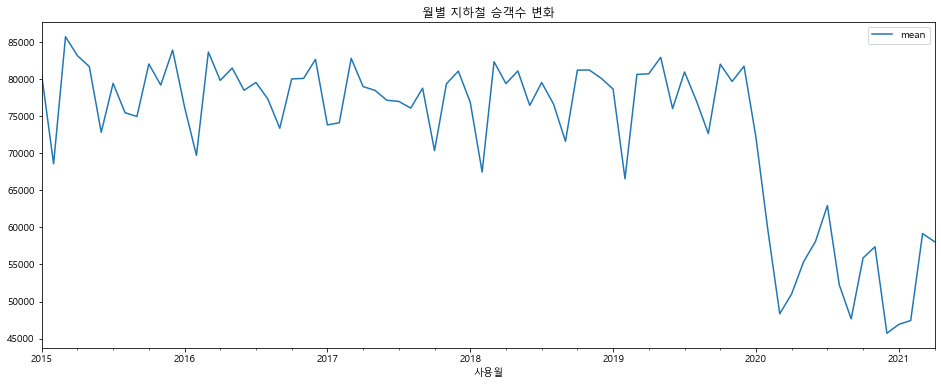

In [88]:
# 월별 지하철 승객 수 변화

fig, ax = plt.subplots(figsize=(16, 6))
plt.rc('font', family = 'Malgun Gothic')
subway02_mean.plot(title='월별 지하철 승객수 변화', ax=ax)

- 2015년 1월부터 2021년 4월까지 2호선 지하철 월 평균 승객수를 나타내었다. 

  그 결과, 그래프를 통하여 국내 첫 코로나 확진자가 발생한 2020년 1월부터 지하철 이용객수가 급격하게 감소하는 것을 확인할 수 있었다.


<br></br>
### 2.2  코로나 전/ 후 월별 승객수 비교.

In [89]:
# 코로나 전 (2015 ~ 2019년)
subway_before =  subway02_melt[subway02_melt.사용월.between('2015-01-01','2019-12-31')]
subway_before['월'] = subway_before['사용월'].dt.month
subway_before

<ipython-input-89-beb3c5cfd320>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_before['월'] = subway_before['사용월'].dt.month


,사용월,지하철역,시간,승객수,월
800,2019-12-01,강남,04-05,344,12
801,2019-12-01,강변,04-05,31,12
802,2019-12-01,건대입구,04-05,380,12
803,2019-12-01,교대,04-05,18,12
804,2019-12-01,구로디지털단지,04-05,228,12
...,...,...,...,...,...
91195,2015-01-01,종합운동장,03-04,0,1
91196,2015-01-01,충정로,03-04,0,1
91197,2015-01-01,한양대,03-04,0,1
91198,2015-01-01,합정,03-04,0,1


In [90]:
#코로나 전 월별 평균 (2015년~ 2019년)
subway02_month = (
    subway_before   
    .groupby(['월'])['승객수']
    .agg(['mean'])
    .sort_values('월',ascending=True) 
    .reset_index().astype(int)
)
subway02_month      

,월,mean
0,1,77194
1,2,69265
2,3,82989
3,4,80381
4,5,81102
5,6,76156
6,7,79260
7,8,76479
8,9,74243
9,10,79093


In [91]:
#코로나 후 (2020년)
subway_after = subway02_melt[subway02_melt.사용월.between('2020-01-01','2020-12-31')]
subway_after['월']= subway_after['사용월'].dt.month
subway_after

<ipython-input-91-05bfa988b62a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_after['월']= subway_after['사용월'].dt.month


,사용월,지하철역,시간,승객수,월
200,2020-12-01,강남,04-05,88,12
201,2020-12-01,강변,04-05,10,12
202,2020-12-01,건대입구,04-05,179,12
203,2020-12-01,교대,04-05,14,12
204,2020-12-01,구로디지털단지,04-05,206,12
...,...,...,...,...,...
88195,2020-01-01,종합운동장,03-04,0,1
88196,2020-01-01,충정로,03-04,0,1
88197,2020-01-01,한양대,03-04,0,1
88198,2020-01-01,합정,03-04,0,1


In [92]:
#코로나 후 월별 평균
subway02_aftermonth =  (
    subway_after
    .groupby(['월'])['승객수']
    .agg(['mean'])
    .reset_index().astype(int) 
)
subway02_aftermonth

,월,mean
0,1,72127
1,2,59660
2,3,48350
3,4,51031
4,5,55347
5,6,58083
6,7,62929
7,8,52260
8,9,47669
9,10,55872


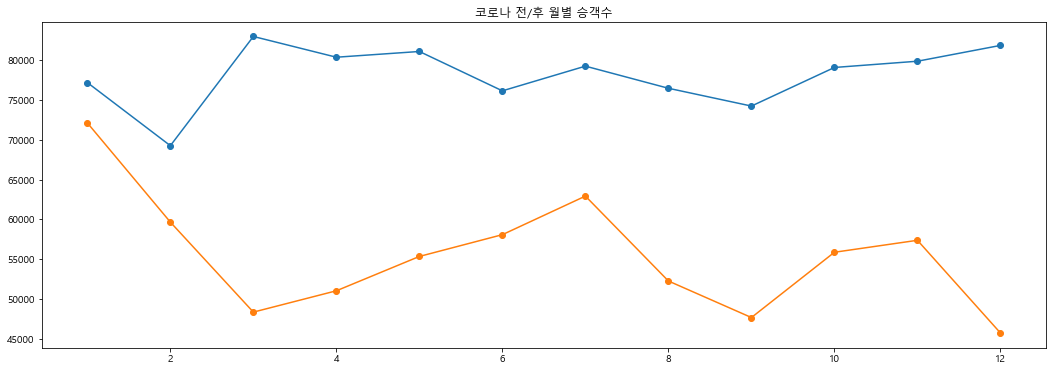

In [93]:
#코로나 전/후 월별 승객수

fig,ax = plt.subplots(figsize = (18,6))
plt.title("코로나 전/후 월별 승객수")
plt.plot(subway02_month['월'],subway02_month['mean'],marker='o',label= "코로나 전(2015 ~ 2019)")
plt.plot(subway02_aftermonth['월'],subway02_aftermonth['mean'],marker = 'o', label = "코로나 후(2020)")
plt.show()

-  코로나 영향을 받기 전 (2015 ~ 2019년) 과 코로나의 영향을 받은 후 (2020년)의 월별 평균 승객수를 분석해보았다.

   코로나의 영향을 받기 전 지하철 월별 승객수를 살펴보면 학생들이 학교를 다니는 시기인 3 ~ 5월 10 ~ 11월에 승객수가 많은 것을 확인할 수 있었습니다. 
   
   반면에 2020년에는 코로나로 인하여 비대면수업으로 진행되다 보니 학교를 다니는 3월 9월 임에도 매우 낮은 승객수를 기록하였다.
   
   또한, 연말행사가 많은 12월달에 코로나 전에는 비교적 높은 승객수를 차지하였었지만, 코로나 영향으로 2020년에는 12월달에 가장 낮은 승객수를 기록하였다.  


<br></br>

### 2.3 코로나 전/ 후 지하철 이용시간 비교.

In [94]:
subway02_time = subway02_melt.pivot_table(index ='시간', 
                                         columns = '사용월',
                                         values = '승객수',
                                         aggfunc = 'mean')

subway02_time

사용월,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,...,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01
시간,,,,,,,,,,,,,,,,,,,,,
00-01,12312.52,10526.68,13304.82,13904.82,13882.04,12409.42,13343.14,12023.20,12288.84,12741.60,...,1738.84,1226.48,784.90,1419.42,1269.58,294.46,368.64,430.60,635.48,611.42
01-02,458.52,513.94,551.92,553.66,564.84,506.48,535.82,454.74,603.02,494.30,...,0.84,0.66,0.76,20.02,0.84,0.40,0.08,0.72,0.80,0.28
02-03,0.28,13.60,0.30,0.52,0.26,0.38,0.28,0.46,11.82,0.18,...,0.14,0.14,0.28,2.48,0.60,0.20,0.10,0.04,0.18,0.04
03-04,0.34,0.30,0.34,0.14,0.30,0.22,0.16,0.18,0.46,0.00,...,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00
04-05,287.10,228.08,287.76,287.62,330.72,302.98,298.36,289.76,284.44,315.94,...,259.96,237.36,251.26,263.80,269.68,229.46,197.52,182.56,227.04,226.64
05-06,13889.90,11403.92,14692.32,15000.86,16299.00,15318.24,15540.78,14984.90,14175.62,15545.22,...,12429.92,10802.22,10679.42,11202.10,11319.12,9822.20,8991.24,8322.08,10710.58,10724.34
06-07,36125.76,30153.22,40124.12,41057.00,40469.72,39694.20,40846.86,38496.82,37578.02,40980.94,...,33434.06,28617.88,27699.78,28774.76,29680.36,26408.78,25055.94,23133.04,29798.56,30366.32
07-08,94352.22,79116.82,113036.54,112893.92,99337.58,105427.68,105477.52,93816.34,99191.62,105064.58,...,85648.74,70128.56,68799.70,71866.58,75293.66,64817.84,63872.52,59398.24,79735.10,79822.58
08-09,182502.86,149446.46,200598.06,197955.16,173448.92,184060.18,190645.90,166663.18,176055.52,189253.18,...,162999.34,133403.90,130061.90,139225.42,149566.26,128521.94,126203.94,119594.36,154703.90,154092.74


<AxesSubplot:xlabel='사용월', ylabel='시간'>

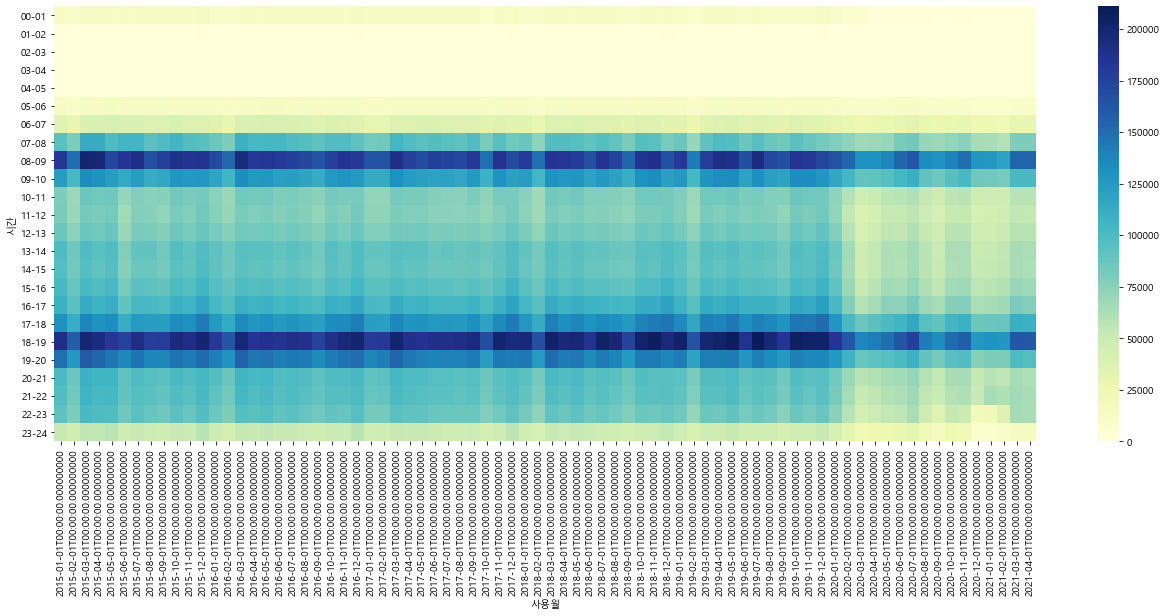

In [95]:
plt.figure(figsize = (22,8))
sns.heatmap(data = subway02_time,cmap = 'YlGnBu')

- 2015년 1월부터 2021년 4월 까지 지하철 이용시간을 히트맵을 통해 시각화 해보았다.


  앞의 '지하철 월별 승객수 변화' 의 그래프를 통하여 알 수 있듯이 2020년 1월 부터 지하철 승객수가 급격하게 감소하므로 인하여
  
  
  2020년부터 색깔이 확연하게 연해지는 것을 확인할 수 있었다.
  
  
  대부분 비대면으로 진행이 되어, 코로나 발생이후에는 지하철이 붐비는 시간이 특정시간이 아니라 균일하게 색이 분포되어 있을 것이라는 예상과 달리 
  
  코로나 전과 동일하게 출근 시간인 8 ~ 9 시, 퇴근 시간인 6 ~ 7 시 사이에 승객수가 많은 것을 확인 할 수 있었다.
  
  아마도 학교 같은 경우는 비대면 수업으로 진행이 되었지만 직장인 분들은 코로나 전과 동일하게 출퇴근을 하다보니 이러한 모습이 나타났다고 생각한다.
  
  
  

<br></br>

### 2.4 코로나 전/ 후 지하철역별 비교.

In [105]:
# 지하철역별 월평균 승객수 내림차순으로 정렬.(코로나 전)

subway02_subwaymean = (
    subway_before
    .groupby(['지하철역'])['승객수']
    .agg(['mean'])
    .sort_values('mean',ascending=False) 
)
subway02_subwaymean = subway02_subwaymean[['mean']].astype(int).reset_index()  #평균값 정수로 변환.
subway02_subwaymean

,지하철역,mean
0,강남,256476
1,잠실,212792
2,홍대입구,204143
3,신림,179245
4,구로디지털단지,159409
5,신도림,155561
6,삼성,149164
7,서울대입구,133061
8,선릉,128177
9,신촌,127385


In [106]:
 #2015 ~ 2021년 4월 지하철 2호선 월평균 승객수.
subway02_subwaymean.mean().astype(int)  

mean    77937
dtype: int32

<AxesSubplot:title={'center':'2호선 지하철역별 월평균 승객수'}, xlabel='mean', ylabel='지하철역'>

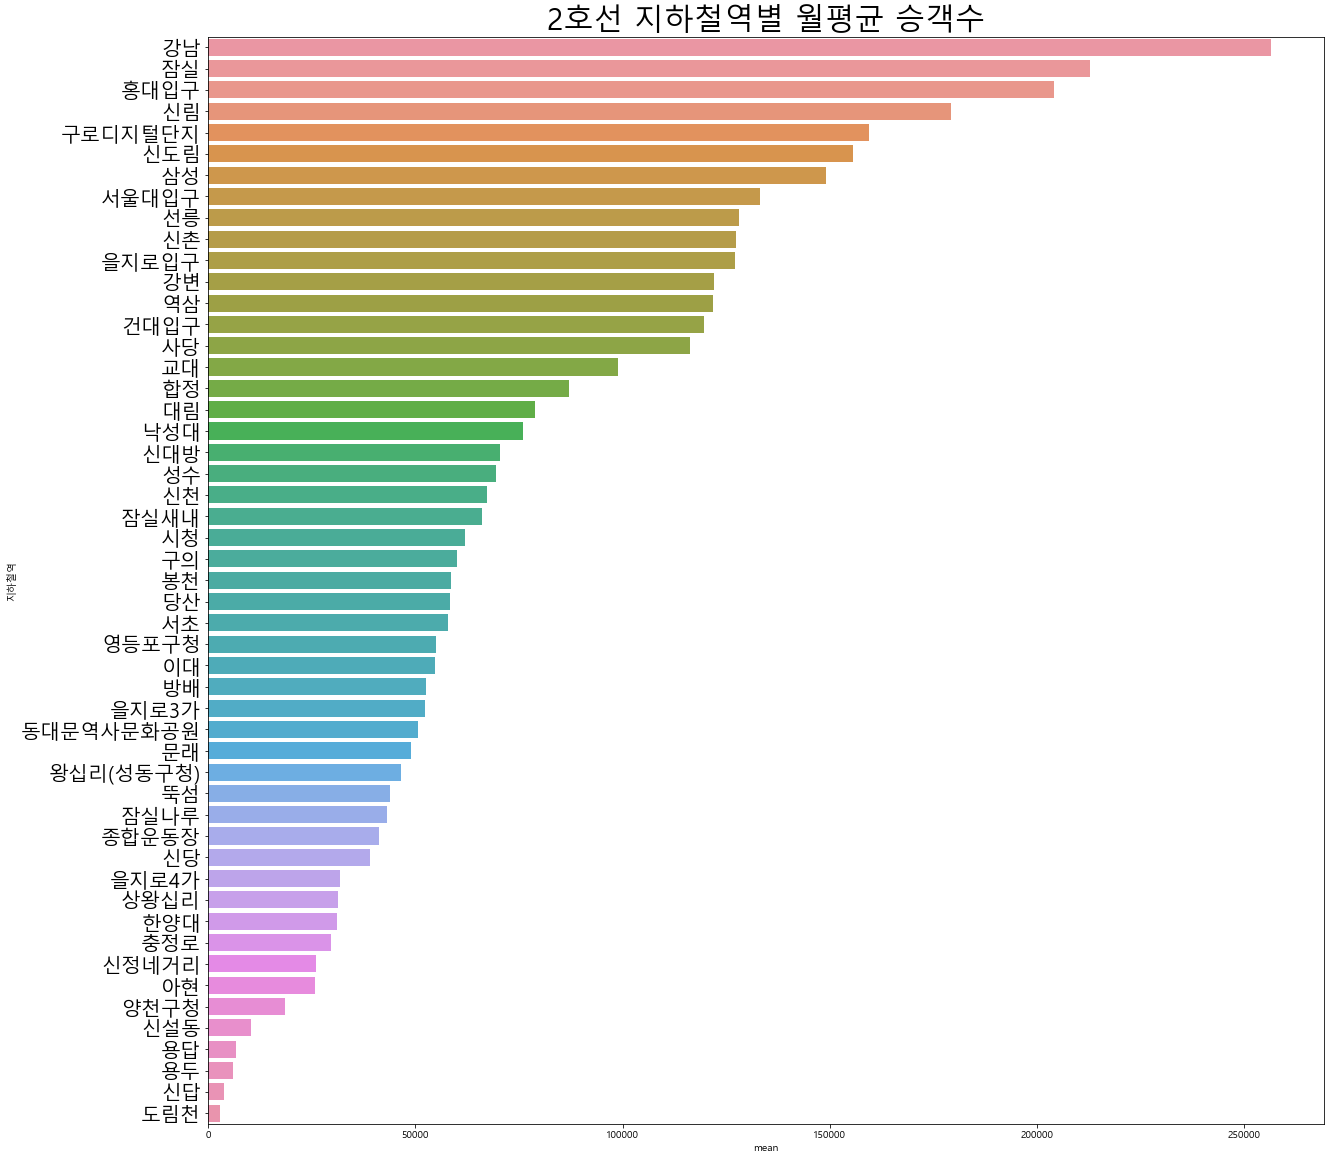

In [107]:
#지하철 2호선 지하철역별  월평균 지하철 이용객수 (코로나 전)

fig,ax = plt.subplots(figsize = (20,20))
plt.rc('font', family = 'Malgun Gothic')
plt.title("2호선 지하철역별 월평균 승객수",fontsize = 30)
plt.yticks(fontsize = 20)
sns.barplot(data = subway02_subwaymean, y = "지하철역", x= 'mean') 


   
-   코로나 전, 지하철역별로 살펴보았을 때 지하철 2호선은 강남, 잠실, 홍대입구, 신림역은 상대적으로 다른 역들에 비해 많은 승객수를 가지고 있는 것으로 보였다.
   
    특히, 강남역의 경우에는 승객수가 압도적으로 많음을 알 수 있었다. 

In [130]:
# 코로나 후 지하철역별 월별 승객수 
subway02_subwaymean_after = (
    subway_after
    .groupby(['지하철역'])['승객수']
    .agg(['mean'])
    .sort_values('mean',ascending=False) 
)
subway02_subwaymean_after = subway02_subwaymean_after[['mean']].astype(int).reset_index()  #평균값 정수로 변환.
subway02_subwaymean_after

,지하철역,mean
0,강남,180200
1,잠실,140699
2,신림,134850
3,구로디지털단지,124459
4,홍대입구,120570
5,신도림,104899
6,삼성,103798
7,선릉,103471
8,서울대입구,100519
9,역삼,100272


<AxesSubplot:xlabel='지하철역', ylabel='mean'>

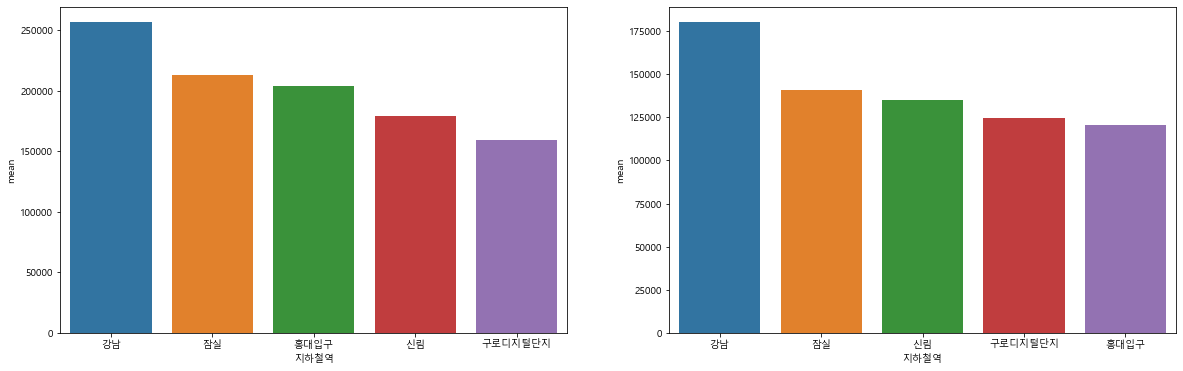

In [134]:
# 코로나 전/ 후 지하철역 상위 5개 비교

fig, ax = plt.subplots(figsize = (20,6), ncols =2)
sns.barplot(data =subway02_subwaymean.nlargest(5,'mean'), x = '지하철역', y ='mean' ,ax = ax[0])  #코로나 전(왼쪽)
sns.barplot(data =subway02_subwaymean_after.nlargest(5,'mean') , x = '지하철역', y ='mean' ,ax = ax[1])   #코로나 후 (오른쪽) 

- 코로나 전(왼쪽) / 후(오른쪽)로 상위 5개 지하철역을 비교해 보았을 때, 3 ~ 5 위의 약간의 순위 변동은 있있지만, 

  코로나 전과 동일하게 이용객수 많은 지하철임을 알 수 있었다. 

In [131]:
subwayname=pd.merge(subway02_subwaymean, subway02_subwaymean_after, on = "지하철역").rename(columns = {'mean_x':'2019','mean_y':'2020'}).set_index('지하철역')
subwayname

,2019,2020
지하철역,,
강남,256476,180200
잠실,212792,140699
홍대입구,204143,120570
신림,179245,134850
구로디지털단지,159409,124459
신도림,155561,104899
삼성,149164,103798
서울대입구,133061,100519
선릉,128177,103471


<AxesSubplot:ylabel='지하철역'>

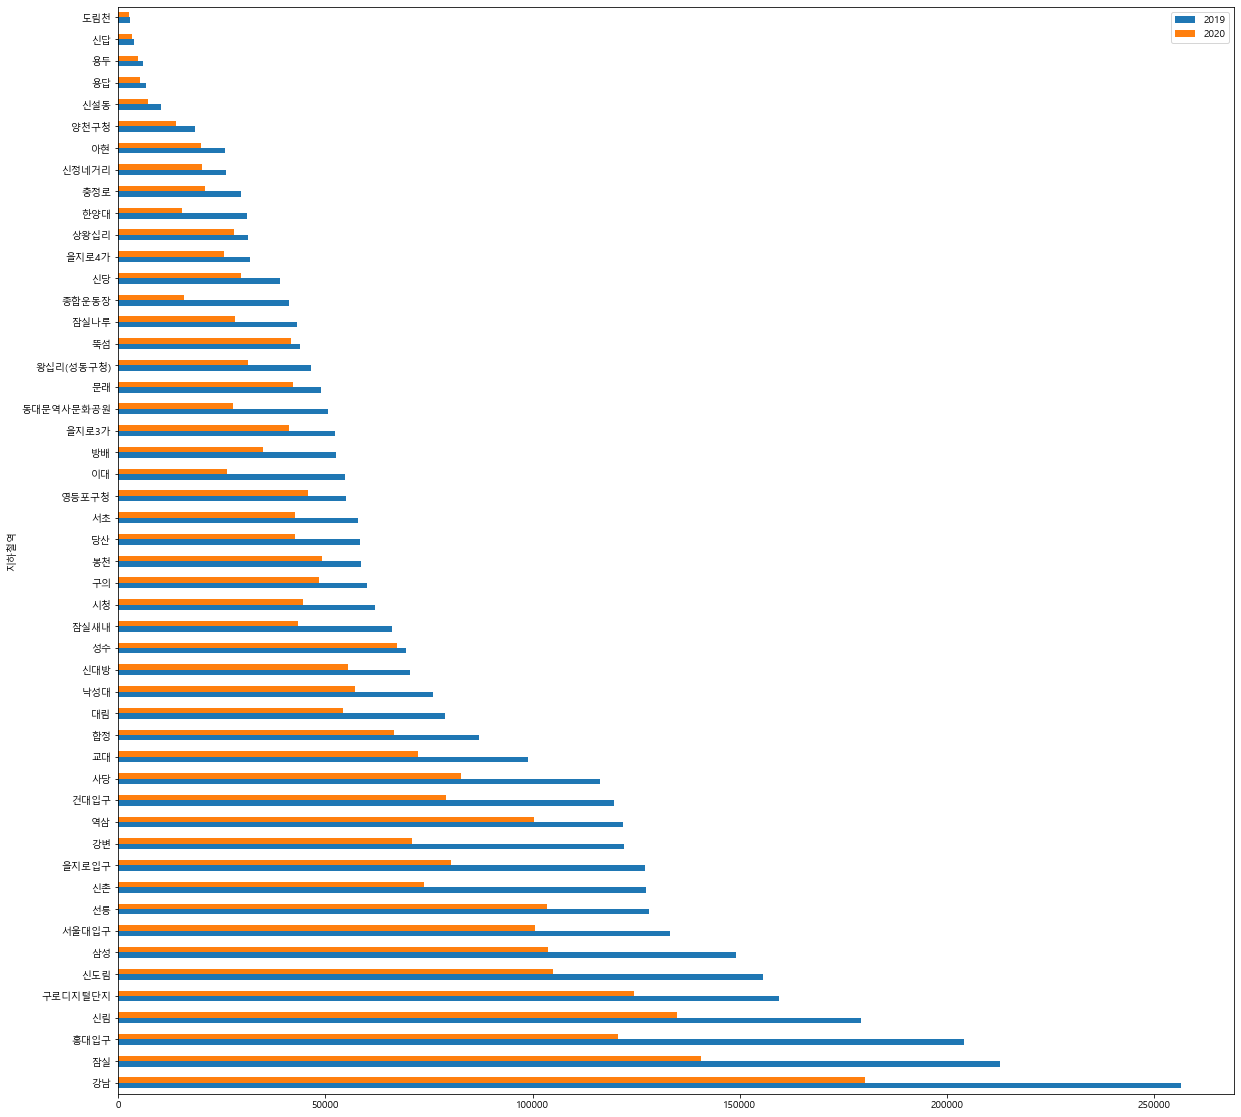

In [132]:
# 코로나 전/ 후 지하철역별 월별 승객수 비교
fig,ax = plt.subplots(figsize = (20,20))
subwayname.plot(kind = 'barh', ax = ax)



- 코로나 전/ 후로 전체 지하철역별로 승객수를 비교해보았을 때 상위 지하철 순위의 변동은 크게 나타나지 않았지만,

  비대면 수업 여파로 인하여  한양대, 이대역,신촌역과 같이 대학가를 중심으로 승객수가 대폭 감소한 것을 확인할 수 있었습니다.

